In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("train_exit.csv")

In [ ]:
#EXPLORATORY DATA ANALYSIS

In [3]:
##To display the first five rows of the dataset
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [4]:
#To find the number of rows and columns in the dataset
data.shape

(13994, 30)

In [5]:
#To find the column names
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [6]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [7]:
#To get statistical summary of numerical columns
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [ ]:
## Visualization of the Dataset


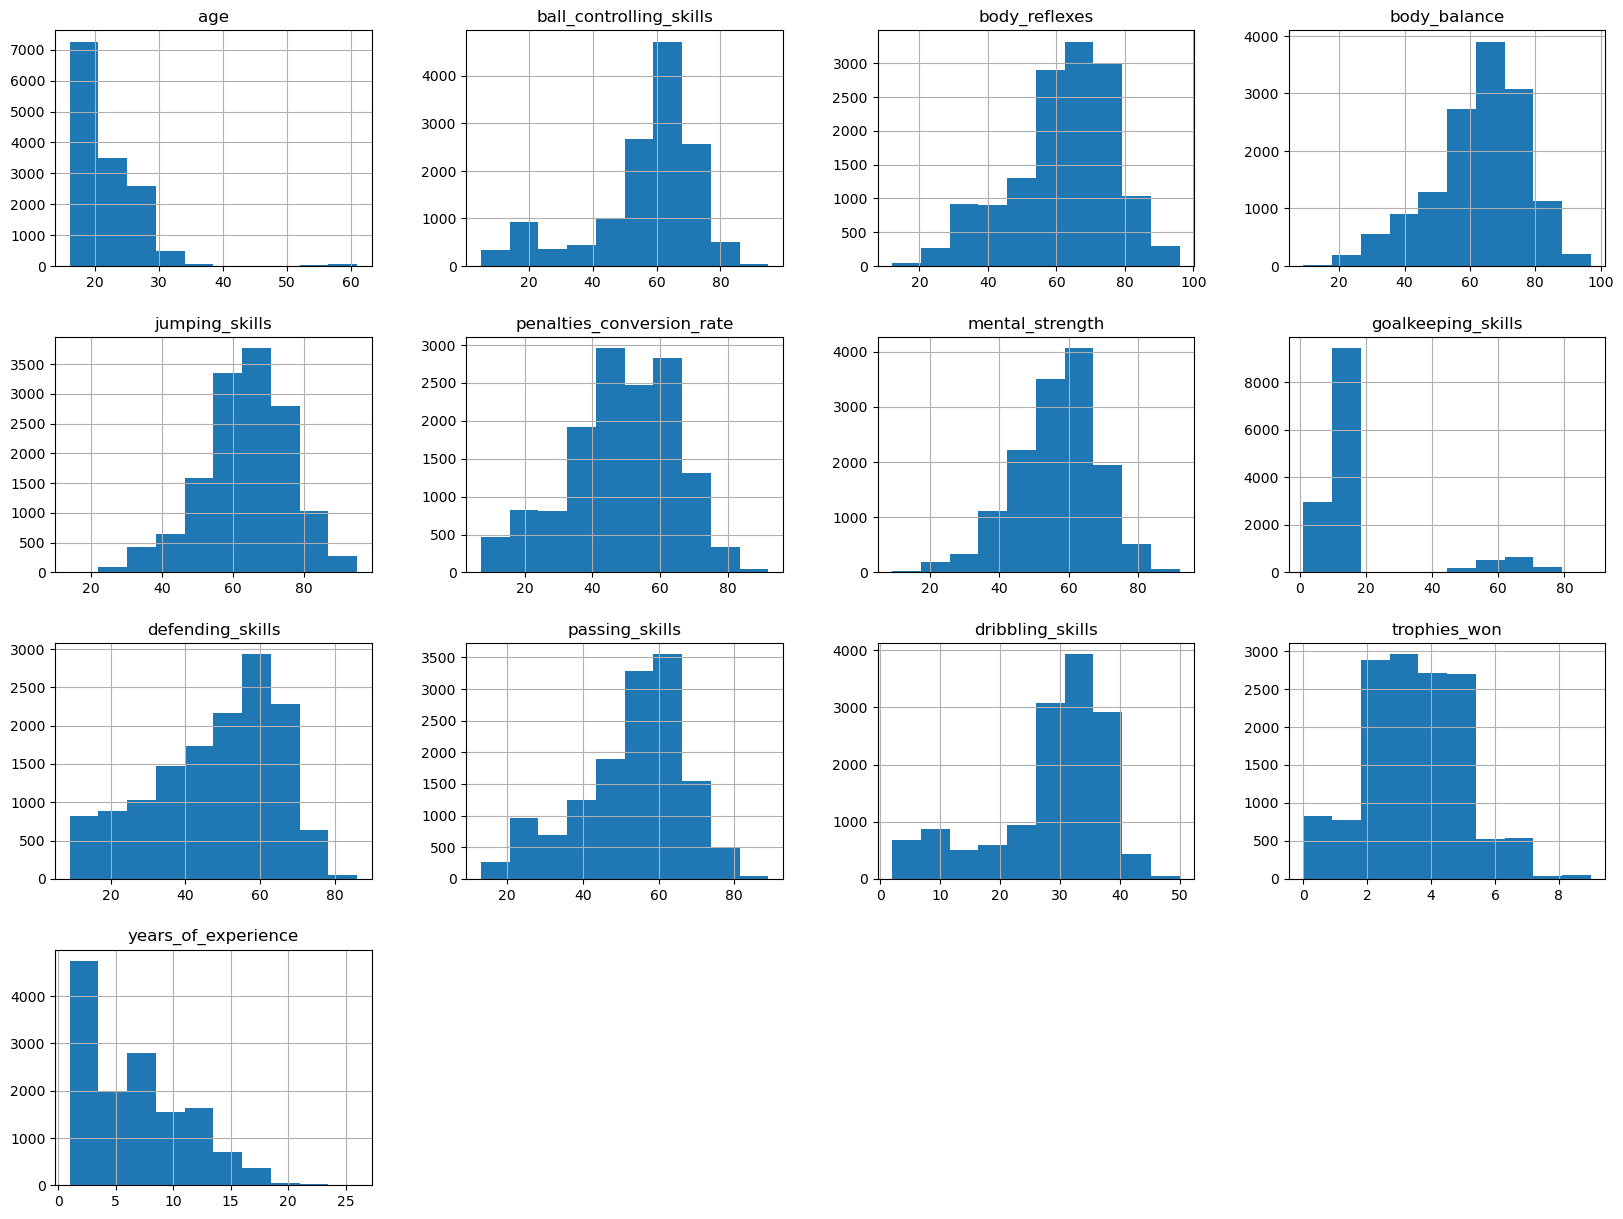

In [10]:
#Plotting histogram to analyse the distribution of some relevent numerical features
col=data[['age', 'ball_controlling_skills','body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate','mental_strength', 'goalkeeping_skills',
       'defending_skills', 'passing_skills', 'dribbling_skills','trophies_won','years_of_experience']]
col.hist(figsize=(20,15))
plt.show()

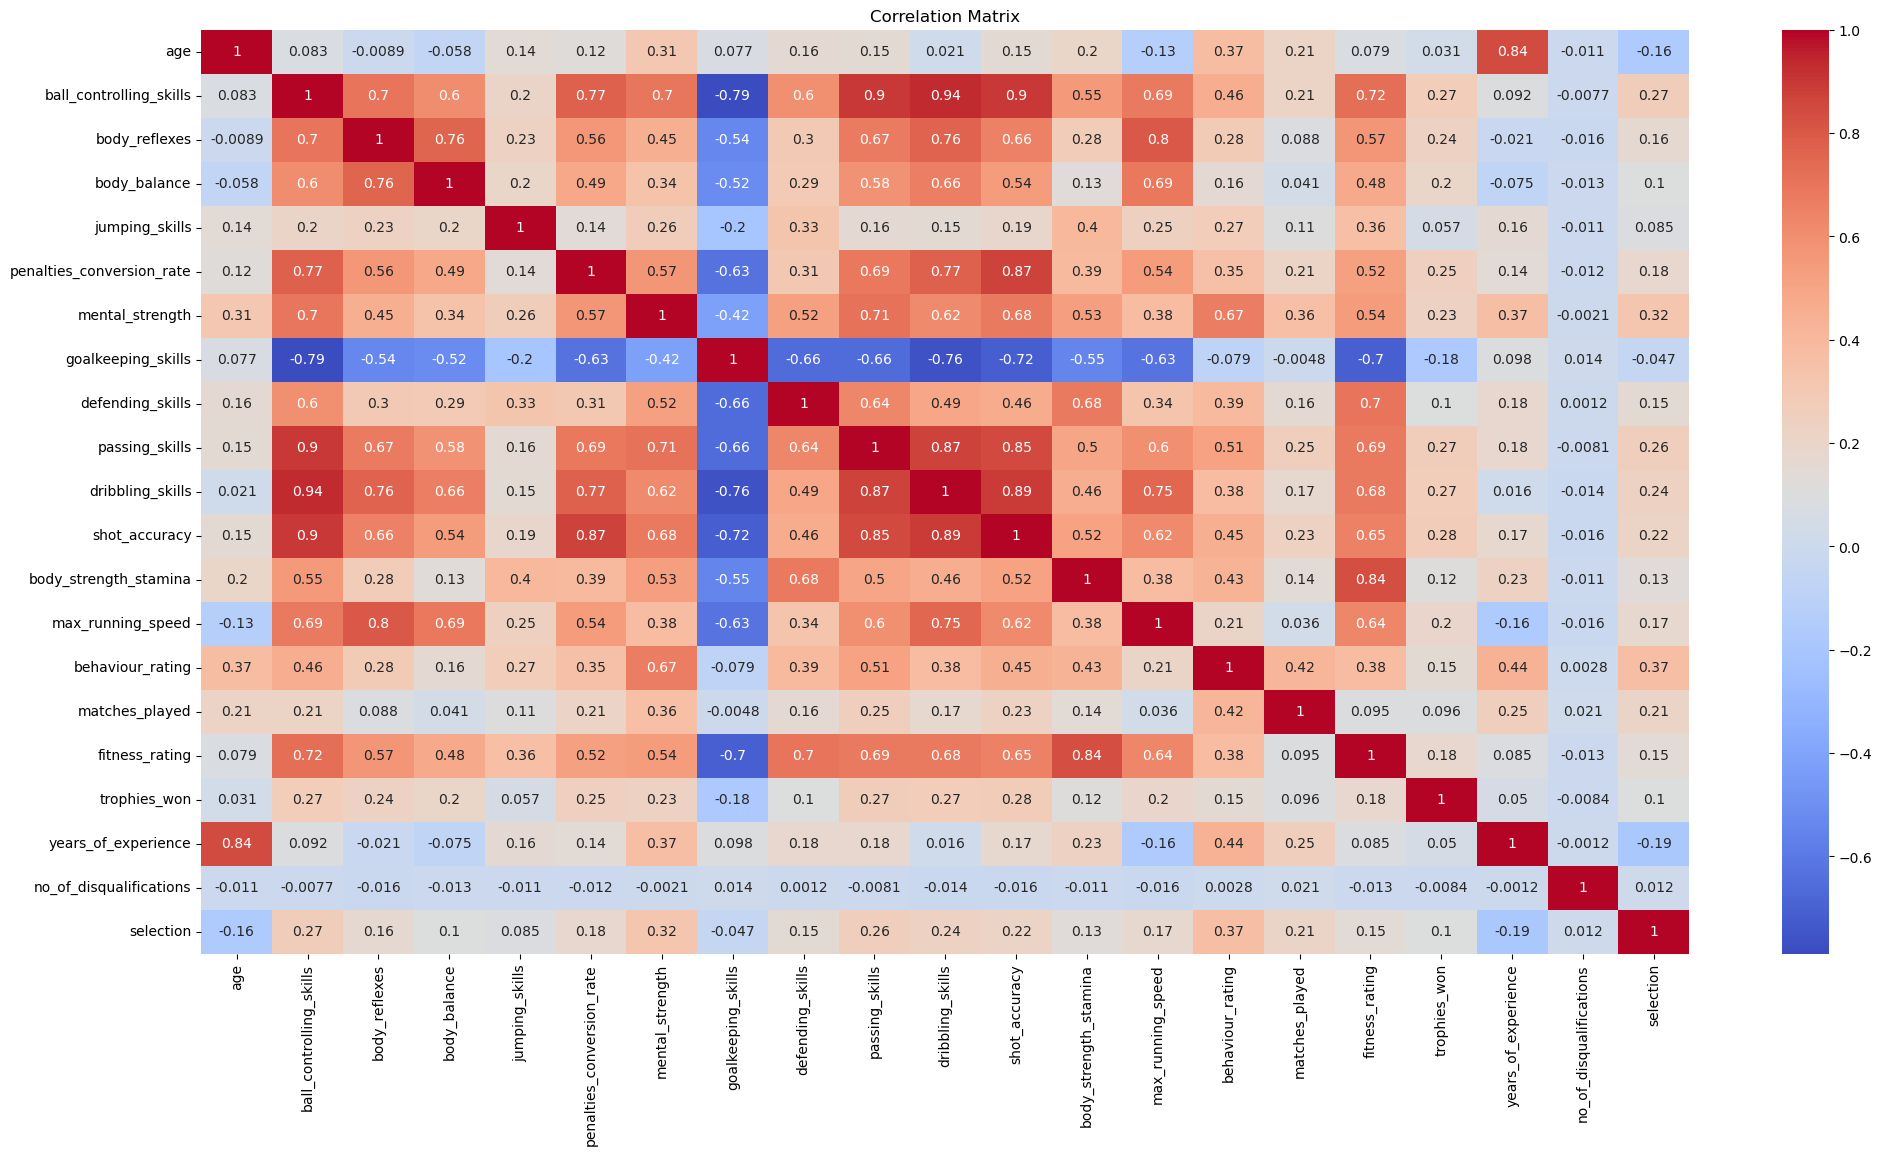

In [11]:
## Checking Correlation
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# DATA PREPROCESSING
## Missing Value Detection

In [12]:
#Checking for null values
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [13]:
#Removing columns having null values
data=data.drop(['gender','weight','ball_controlling_skills','jumping_skills','penalties_conversion_rate','mental_strength','shot_accuracy','strong_foot','behaviour_rating','matches_played','fitness_rating','coaching','years_of_experience'],axis=1)

In [14]:
data.isna().sum()

player_id                  0
name                       0
age                        0
country                    0
height                     0
body_reflexes              0
body_balance               0
goalkeeping_skills         0
defending_skills           0
passing_skills             0
dribbling_skills           0
body_strength_stamina      0
max_running_speed          0
trophies_won               0
dedication_level           0
no_of_disqualifications    0
selection                  0
dtype: int64

In [ ]:
## Outlier Detection


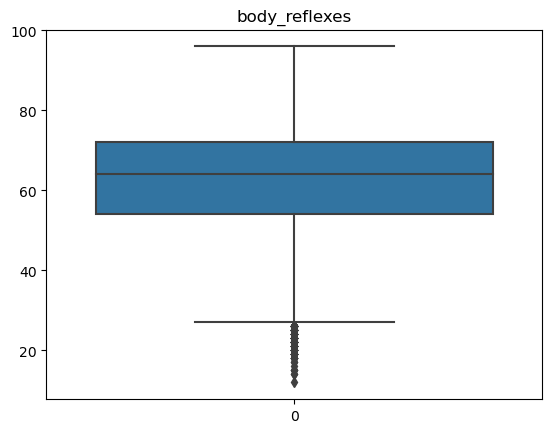

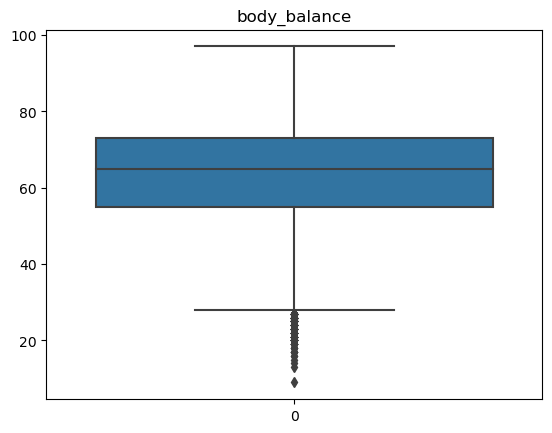

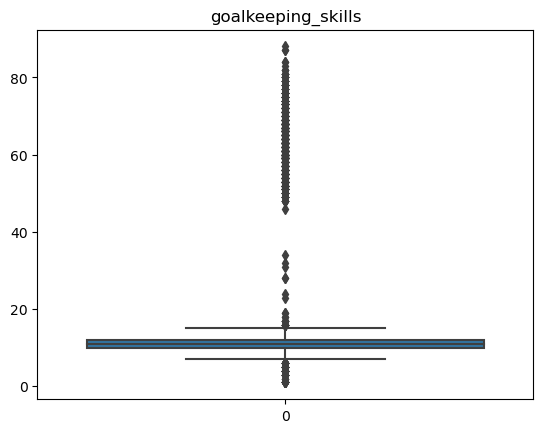

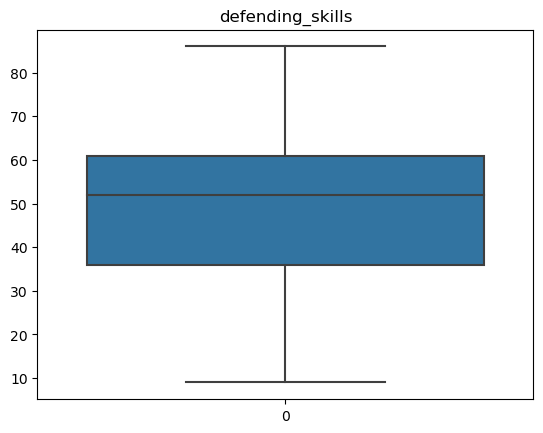

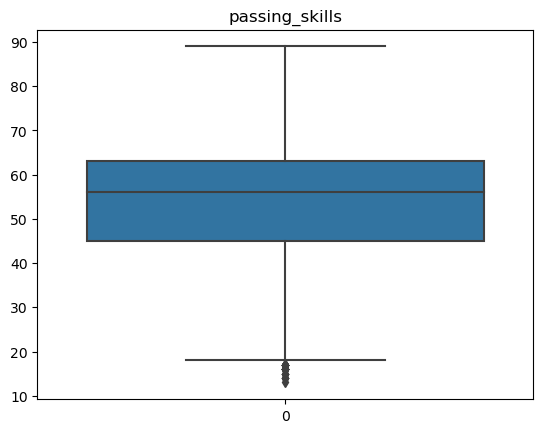

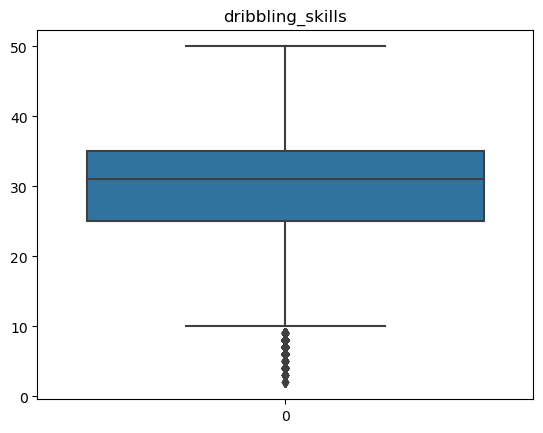

In [26]:
col=['body_reflexes', 'body_balance','goalkeeping_skills','defending_skills','passing_skills',
     'dribbling_skills']
for i in col:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)
plt.show()

In [48]:

data['Is_selected'] = np.where(data['goalkeeping_skills'] > data['passing_skills'],'1','0')

In [32]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_encoders={}
to_encode=['name','country','player_id','dedication_level']
for col in to_encode:
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=dict(zip(le.classes_,le.transform(le.classes_)))

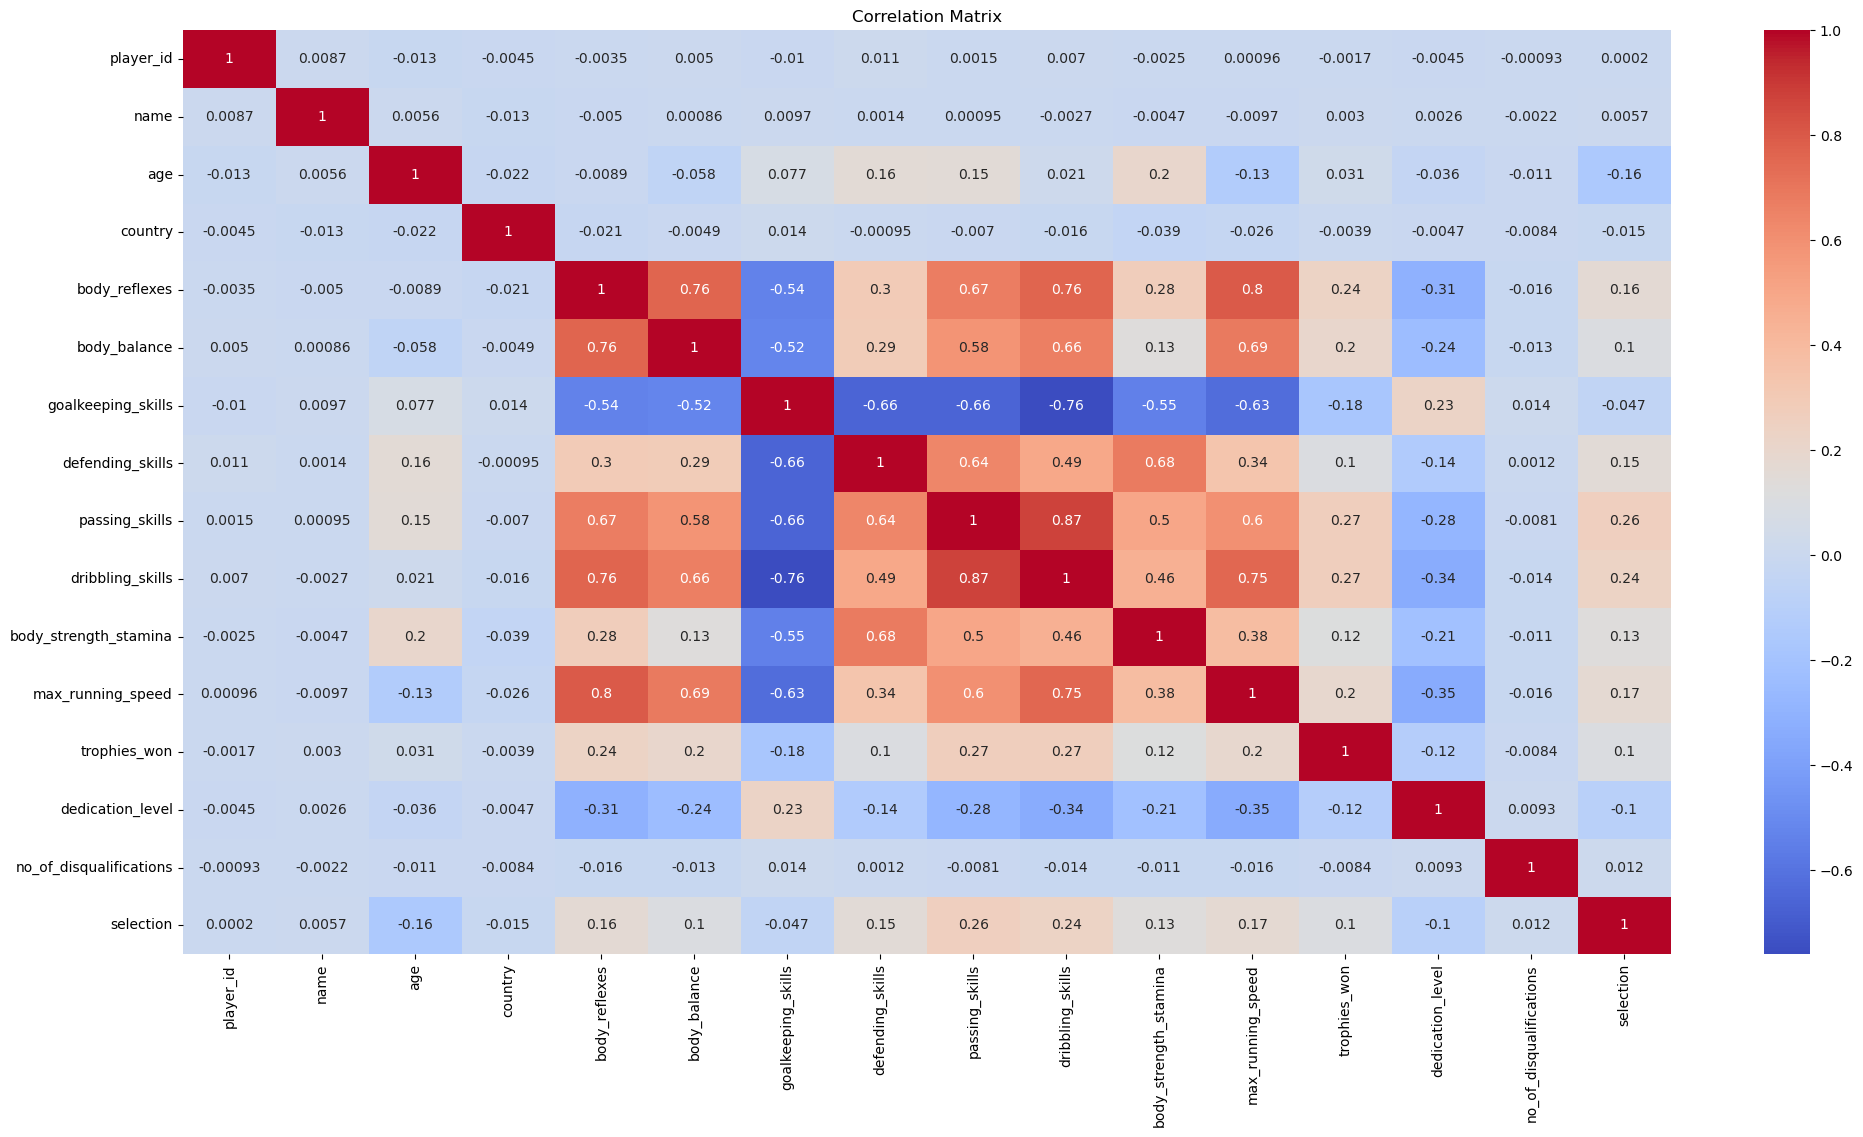

In [22]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [23]:
#Finding highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(data, 0.6)
len(set(corr_features))

5

In [25]:
corr_features

{'body_balance',
 'body_strength_stamina',
 'dribbling_skills',
 'max_running_speed',
 'passing_skills'}

In [36]:
# Feature Selection
x=data.drop(['Is_selected'],axis=1)
y=data['Is_selected']

In [42]:
x=data[['player_id', 'name', 'age',  'country', 'height', 
        'body_reflexes', 'body_balance', 
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills','body_strength_stamina',
       'max_running_speed',  
         'trophies_won', 'dedication_level',
      'no_of_disqualifications',
       'selection']]
y=data['Is_selected']

In [44]:
#Splitting the data in such a way that 80% data is for training and 25% is for testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [49]:
#Defining and training(fitting) the logistic regression model using train data
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)

ValueError: could not convert string to float: 'NO'